In [2]:
pip install tensorflow-datasets

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
import tensorflow as tf

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

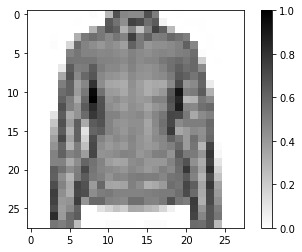

In [4]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

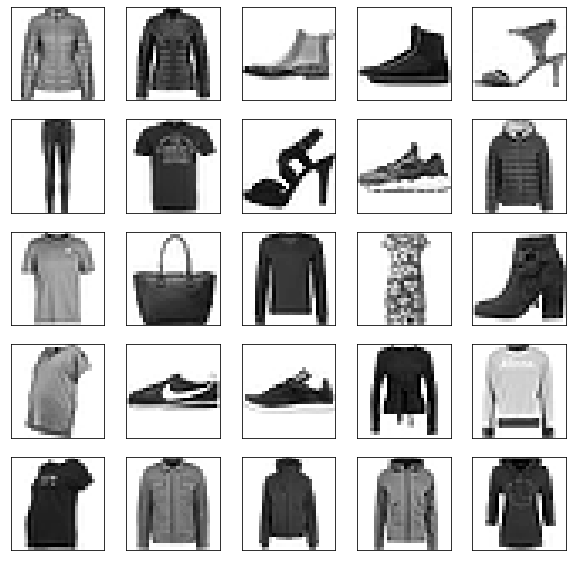

In [5]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    i += 1
plt.show()

In [6]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(60000).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
hist = model.fit(train_dataset, epochs=9, steps_per_epoch=math.ceil(60000/BATCH_SIZE))

Epoch 1/9
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4715 - accuracy: 0.8299
Epoch 2/9
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3572 - accuracy: 0.8686
Epoch 3/9
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3258 - accuracy: 0.8795
Epoch 4/9
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3007 - accuracy: 0.8868
Epoch 5/9
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2808 - accuracy: 0.8951
Epoch 6/9
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2696 - accuracy: 0.8991
Epoch 7/9
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2583 - accuracy: 0.9020
Epoch 8/9
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2471 - accuracy: 0.9074
Epoch 9/9
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2378 - accuracy: 0.9087


In [10]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(10000/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.3420 - accuracy: 0.8827
Accuracy on test dataset: 0.8827000260353088
